In [1]:
!git clone https://github.com/PranavRao25/Temporal_Chatbot.git

/bin/bash: line 1: git: command not found


In [2]:
!pip --version

pip 23.3.1 from /opt/conda/lib/python3.10/site-packages/pip (python 3.10)


In [3]:
!pip install langgraph

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement langgraph (from versions: none)
ERROR: No matching distribution found for langgraph


In [5]:
import langgraph

ModuleNotFoundError: No module named 'langgraph'

In [1]:
import json

In [2]:
with open('temporal_graph_data1.json','r') as f:
    graph_data = json.load(f)

In [3]:
graph_data

{'woke up': {'ngbs': ['',
   'buying a phone',
   'stretching at a yoga studio',
   'getting a coffee',
   'taking photos',
   'reading at the library',
   'buying cookies',
   'waiting at the train station',
   'playing tennis',
   'working at the office',
   'working out',
   'buying lunch',
   'fixing',
   'buying clothes',
   'attending class',
   'walking towards the Statue',
   'buying a bike',
   'waiting at the airport',
   'sitting on a rooftop',
   'watching a movie',
   'walking in the garden',
   'reading',
   'driving to the water park'],
  'time_point': [610,
   671,
   305,
   610,
   366,
   427,
   366,
   427,
   549,
   549,
   427,
   671,
   488,
   305,
   305,
   305,
   305,
   366,
   305,
   366,
   488,
   610,
   366,
   488,
   305,
   427,
   305,
   549,
   305,
   610,
   549,
   366,
   427,
   305,
   305,
   366,
   427,
   488,
   488,
   427,
   366,
   488,
   671,
   305,
   915,
   305,
   305,
   366,
   305,
   366,
   427,
   427,
   366,
   3

In [9]:
import transformers

In [4]:
events = list(graph_data.keys())

each event either has a timepoint or (start_time, end_time, duration)

In [22]:
temp_data = dict()

In [6]:
import numpy as np

In [7]:
np.floor(np.average([1,2,3]))

2.0

In [12]:
graph_data['woke up']['time_point']

[610,
 671,
 305,
 610,
 366,
 427,
 366,
 427,
 549,
 549,
 427,
 671,
 488,
 305,
 305,
 305,
 305,
 366,
 305,
 366,
 488,
 610,
 366,
 488,
 305,
 427,
 305,
 549,
 305,
 610,
 549,
 366,
 427,
 305,
 305,
 366,
 427,
 488,
 488,
 427,
 366,
 488,
 671,
 305,
 915,
 305,
 305,
 366,
 305,
 366,
 427,
 427,
 366,
 305,
 488,
 549,
 610,
 305,
 488,
 488,
 366,
 488,
 366,
 427,
 305,
 366,
 305,
 366,
 305,
 305,
 1464,
 305,
 488,
 488,
 366,
 488,
 366,
 671,
 305,
 366,
 366,
 366,
 610,
 610,
 305,
 610,
 610,
 366,
 305,
 549,
 305,
 427,
 488,
 427,
 366,
 305,
 366,
 549,
 305,
 549,
 305,
 366,
 305,
 366,
 427,
 305,
 305,
 305,
 305,
 488,
 427,
 366,
 305,
 549,
 305,
 793,
 427,
 366,
 305,
 305,
 549,
 549,
 427,
 366,
 549,
 427,
 305,
 305,
 305,
 793,
 305,
 305,
 305,
 305,
 366,
 610,
 549,
 305,
 427,
 305,
 366,
 366,
 366,
 366,
 305,
 366,
 488,
 305,
 305,
 305,
 488,
 610,
 427,
 1464,
 305,
 366,
 305,
 427,
 305,
 305,
 427,
 366,
 488,
 305,
 549,
 305,
 3

In [13]:
time_values = [
    sorted([
        time_value
        for time_value in graph_data[event]['time_point']
        if isinstance(time_value, int)
    ])
    for event in graph_data
]

In [14]:
time_values

[[305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,
  305,

In [15]:
import matplotlib.pyplot as plt

(array([565., 247., 127.,  23.,  14.,   4.,   1.,   0.,   0.,  18.]),
 array([ 305. ,  420.9,  536.8,  652.7,  768.6,  884.5, 1000.4, 1116.3,
        1232.2, 1348.1, 1464. ]),
 <BarContainer object of 10 artists>)

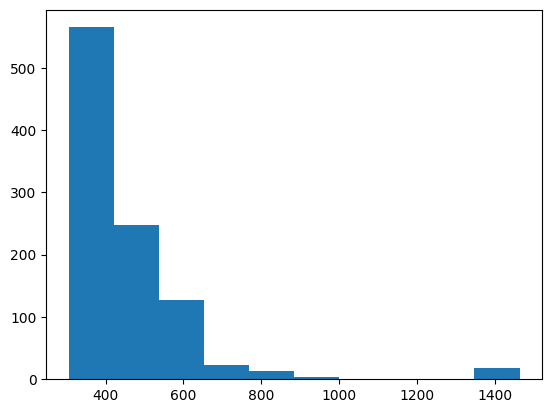

In [16]:
plt.hist(time_values[0])

In [17]:
for event in graph_data:
    time_points_avg_acc = []
    time_durations_avg_acc = []
    time_min_acc = []
        
    for time_values in graph_data[event]['time_point']:
        if isinstance(time_values, list):
            time_interval_acc.append(time_values)
            time_points_acc.append(np.floor(np.average(time_values[:2])))
            time_durations_acc.append(time_values[2])
        else:
            time_points_acc.append(time_values)
            
    time_point_acc = np.floor(np.average(time_points_acc))
    time_duration_acc = np.floor(np.average(time_durations_acc)) if time_durations_acc!=[] else []
    temp_data[event] = [time_point_acc, time_duration_acc]

NameError: name 'time_points_acc' is not defined

In [18]:
l = [1,2,3,4,5,6,7,8,9,0]

In [19]:
def seq_summary_values(l):
    a,s = np.average(l),np.std(l)
    k = [d for d in l if np.absolute(d-a)<s]
    m,n = (min(k),max(k)) if k != [] else (min(l),max(l))
    return m,a,n

In [20]:
for event in graph_data:
    temp_data[event] = dict()
    temp_data[event]['ngbs'] = graph_data[event]['ngbs']
    
    time_points_acc = []
    time_durations_acc = []
    for time_value in graph_data[event]['time_point']:
        if isinstance(time_value, int):
            time_points_acc.append(time_value)
        else:
            time_durations_acc.append(time_value[2])
            time_points_acc.append(np.floor(np.average(time_value[:2])))
    else:
        if time_points_acc == []:
            time_points_acc = [0]
        if time_durations_acc == []:
            time_durations_acc = [0]
    
    k1 = seq_summary_values(time_points_acc)
    k2 = seq_summary_values(time_durations_acc)
    temp_data[event]['time_point'] = [k1,k2]

In [21]:
temp_data

{'woke up': [(305, 428.03803803803805, 610), (0, 0.0, 0)],
 'driving to the water park': [(701.0, 950.8176470588236, 1220),
  (61, 229.06993006993008, 427)],
 'buying clothes': [(610.0, 876.4640883977901, 1159.0),
  (61, 216.68098159509202, 427)],
 'taking photos': [(610.0, 881.2797783933518, 1159.0),
  (61, 211.7386018237082, 427)],
 'buying lunch': [(610.0, 907.0988372093024, 1189.0),
  (61, 204.23417721518987, 366)],
 'reading at the library': [(610.0, 891.14375, 1159),
  (61, 213.955223880597, 427)],
 'was closed after': [(1159, 1241.6385135135135, 1342), (0, 0.0, 0)],
 'waiting at the train station': [(610.0, 893.6648936170212, 1159.0),
  (61, 251.1764705882353, 427)],
 'fixing': [(610.0, 883.9347826086956, 1159), (61, 199.09202453987731, 366)],
 'walking towards the Statue': [(579.0, 895.0364583333334, 1189.0),
  (61, 210.52439024390245, 366)],
 'buying cookies': [(610.0, 908.4861878453039, 1189.0),
  (61, 179.9689440993789, 305)],
 'working at the office': [(610.0, 904.214689265

In [89]:
with open("temp_temporal_graph_data.json","w") as f:
    json.dump(temp_data, f)

In [90]:
from py_heideltime import heideltime

text = "Thurs August 31st - News today that they are beginning to evacuate the London children tomorrow. Percy is a billeting officer. I can't see that they will be much safer here."

timexs = heideltime(
    text,
    language='English',
    document_type='news',
    dct='1939-08-31'
)

print(timexs)

/bin/sh: 1: java: not found


IndexError: list index out of range

In [4]:
import json

In [5]:
with open('temp_temporal_graph_data.json', 'r') as f:
    data = json.load(f)

In [6]:
data

{'woke up': [[300, 395.1, 480], [0, 0.0, 0]],
 'saw Susan driving to the water park': [[540.0, 768.75, 1110.0],
  [60, 248.57142857142858, 240]],
 'saw Susan buying clothes': [[330.0, 620.0, 840.0], [60, 200.0, 120]],
 'saw Susan taking photos': [[720.0, 837.2727272727273, 1080],
  [120, 233.33333333333334, 360]],
 'saw Susan buying lunch': [[810.0, 865.0, 1110.0], [60, 130.0, 180]],
 'saw Susan reading at the library': [[390.0, 730.0, 1050.0],
  [60, 200.0, 240]],
 'was closed after': [[1140, 1221.3490725126476, 1320], [0, 0.0, 0]],
 'saw Emily waiting at the train station': [[510.0, 765.0, 930.0],
  [60, 228.0, 300]],
 'saw Emily fixing': [[810.0, 765.0, 870.0], [60, 210.0, 180]],
 'saw Emily walking towards the Statue': [[540.0, 780.0, 600.0],
  [240, 360.0, 480]],
 'saw Susan buying cookies': [[750.0, 996.0, 1140.0], [120, 150.0, 180]],
 'saw Susan working at the office': [[930.0, 915.0, 990.0], [60, 60.0, 60]],
 'saw Susan walking towards the Statue': [[1050.0, 1030.0, 1050.0],
  

In [7]:
with open('temporal_graph_data.json', 'r') as k:
    data1 = json.load(k)

In [8]:
data1

{'woke up': [420,
  600,
  660,
  300,
  600,
  360,
  420,
  360,
  420,
  540,
  540,
  420,
  660,
  480,
  300,
  300,
  300,
  300,
  360,
  300,
  360,
  480,
  600,
  360,
  480,
  300,
  420,
  300,
  540,
  300,
  600,
  540,
  360,
  420,
  300,
  300,
  360,
  420,
  480,
  480,
  420,
  360,
  480,
  660,
  300,
  900,
  300,
  300,
  360,
  300,
  360,
  420,
  420,
  360,
  300,
  480,
  540,
  600,
  300,
  480,
  480,
  360,
  480,
  360,
  420,
  300,
  360,
  300,
  360,
  300,
  300,
  0,
  300,
  480,
  480,
  360,
  480,
  360,
  660,
  300,
  360,
  360,
  360,
  600,
  600,
  300,
  600,
  600,
  360,
  300,
  540,
  300,
  420,
  480,
  420,
  360,
  300,
  360,
  540,
  300,
  540,
  300,
  360,
  300,
  360,
  420,
  300,
  300,
  300,
  300,
  480,
  420,
  360,
  300,
  540,
  300,
  780,
  420,
  360,
  300,
  300,
  540,
  540,
  420,
  360,
  540,
  420,
  300,
  300,
  300,
  780,
  300,
  300,
  300,
  300,
  360,
  600,
  540,
  300,
  420,
  300,
  36